# Root Finding

Root finding refers to the process of finding solutions to equations of the form f(x) = 0. This is a fundamental problem in numerical analysis and has various applications in science and engineering.

In [1]:
# First let's import necessary libs
import matplotlib.pyplot as plt
import numpy as np
import math

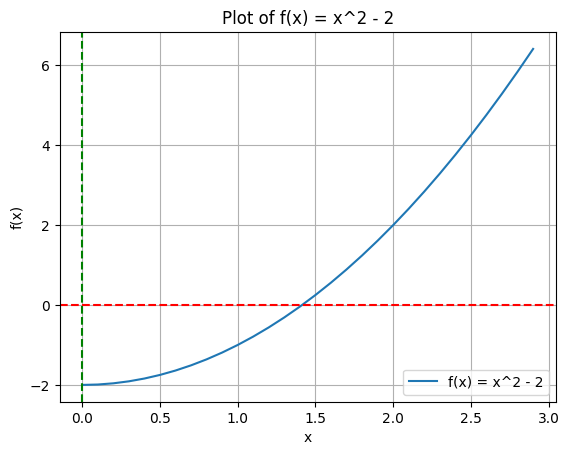

In [2]:
# Our first function
def f(x):
  return x**2 - 2

# Let's plot the function
x = np.arange(0, 3, 0.1)
plt.plot(x, f(x), label='f(x) = x^2 - 2')

plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='green', linestyle='--')

plt.xlabel('x')
plt.ylabel('f(x)')

plt.title('Plot of f(x) = x^2 - 2')
plt.grid()
plt.legend()

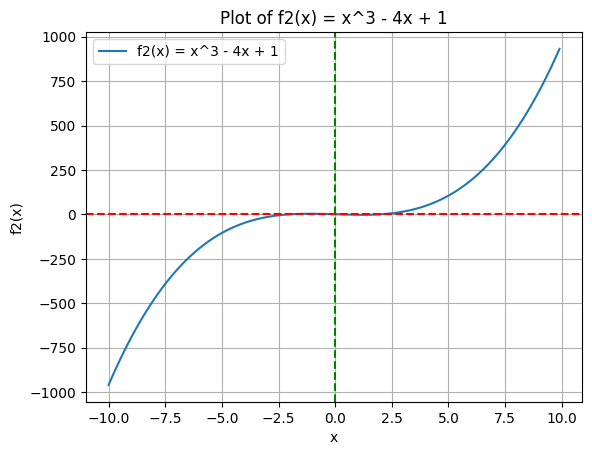

In [3]:
# Our second function
def f2(x):
  return x**3 - 4 * x + 1

# Let's plot the function
x = np.arange(-10, 10, 0.1)
plt.plot(x, f2(x), label='f2(x) = x^3 - 4x + 1')

plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='green', linestyle='--')

plt.xlabel('x')
plt.ylabel('f2(x)')

plt.title('Plot of f2(x) = x^3 - 4x + 1')
plt.grid()
plt.legend()

## Bisection Method

**Bisection method** finds the root of a function *f* in the interval [a, b].

```python
Parameters:
- f : function  
  The function for which we want to find the root.
- a : float  
  The start of the interval.
- b : float  
  The end of the interval.
- tol : float  
  The tolerance for convergence.

Returns:
- float  
  The approximate root of the function.
  ```

In [4]:
def bisection_method(f, a, b, tol=1e-5):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")

    mid = (a + b) / 2.0

    if abs(f(mid)) < tol:
        return mid
    elif f(a) * f(mid) < 0:
        return bisection_method(f, a, mid, tol)
    else:
        return bisection_method(f, mid, b, tol)

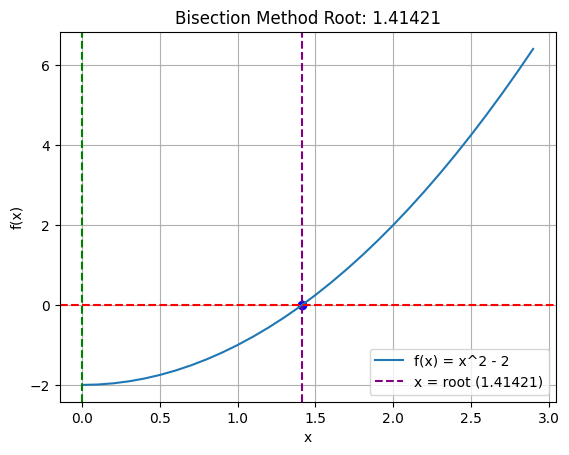

In [5]:
root = bisection_method(f, 0, 10)

# Let's plot the result
x = np.arange(0, 3, 0.1)

plt.plot(x, f(x), label='f(x) = x^2 - 2')
plt.scatter(root, f(root), color='blue')  # Mark the root on the plot
plt.axvline(root, color='purple', linestyle='--', label=f'x = root ({root:.5f})')

plt.axvline(0, color='green', linestyle='--')
plt.axhline(0, color='red', linestyle='--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f"Bisection Method Root: {root:.5f}")
plt.grid()
plt.legend()

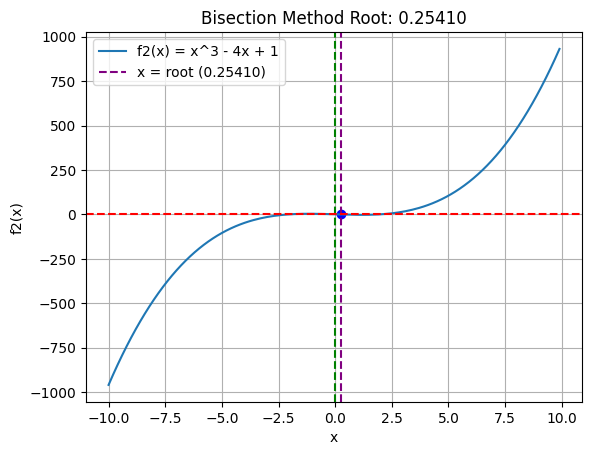

In [6]:
root = bisection_method(f2, -1, 1)

# Let's plot the result
x = np.arange(-10, 10, 0.1)

plt.plot(x, f2(x), label='f2(x) = x^3 - 4x + 1')
plt.scatter(root, f2(root), color='blue')  # Mark the root on the plot
plt.axvline(root, color='purple', linestyle='--', label=f'x = root ({root:.5f})')

plt.axvline(0, color='green', linestyle='--')
plt.axhline(0, color='red', linestyle='--')

plt.xlabel('x')
plt.ylabel('f2(x)')
plt.title(f"Bisection Method Root: {root:.5f}")
plt.grid()
plt.legend()

## False Position Method

In [7]:
def false_position_method(f, a, b, tol=1e-5):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")

    c = a - (f(a) * (b - a)) / (f(b) - f(a))

    if abs(f(c)) < tol:
        return c
    elif f(a) * f(c) < 0:
        return false_position_method(f, a, c, tol)
    else:
        return false_position_method(f, c, b, tol)

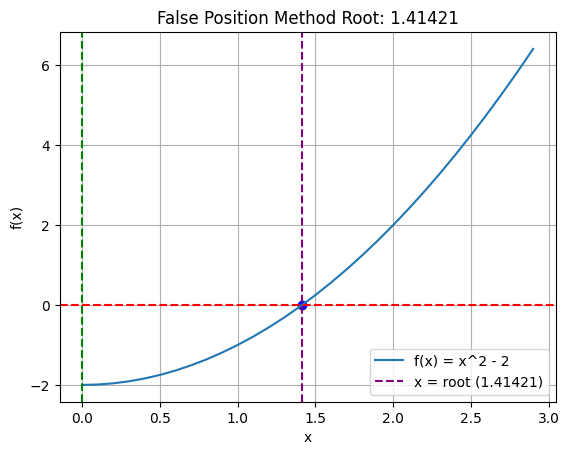

In [8]:
root = false_position_method(f, 0, 10)

# Let's plot the result
x = np.arange(0, 3, 0.1)

plt.plot(x, f(x), label='f(x) = x^2 - 2')
plt.scatter(root, f(root), color='blue')  # Mark the root on the plot
plt.axvline(root, color='purple', linestyle='--', label=f'x = root ({root:.5f})')

plt.axvline(0, color='green', linestyle='--')
plt.axhline(0, color='red', linestyle='--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f"False Position Method Root: {root:.5f}")
plt.grid()
plt.legend()

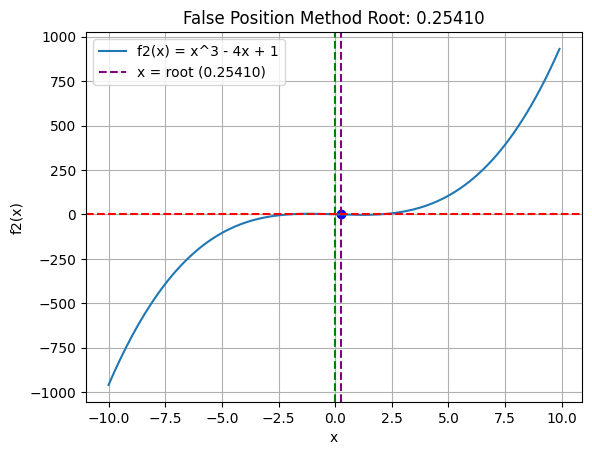

In [9]:
root = false_position_method(f2, -1, 1)

# Let's plot the result
x = np.arange(-10, 10, 0.1)

plt.plot(x, f2(x), label='f2(x) = x^3 - 4x + 1')
plt.scatter(root, f2(root), color='blue')  # Mark the root on the plot
plt.axvline(root, color='purple', linestyle='--', label=f'x = root ({root:.5f})')

plt.axvline(0, color='green', linestyle='--')
plt.axhline(0, color='red', linestyle='--')

plt.xlabel('x')
plt.ylabel('f2(x)')
plt.title(f"False Position Method Root: {root:.5f}")
plt.grid()
plt.legend()

## Iteration Method

The iteration method is a common approach to find roots of equations. It involves rearranging the equation into the form x = g(x) and then iteratively applying g to an initial guess until convergence.

Let's consider the equation $x^3 - 4x + 1 = 0$. We can rearrange it to $x = \frac{x^3 + 1}{4}$. 

In [10]:
def f2(x):
    return x**3 - 4*x + 1

def g2(x):
    return (x**3 + 1) / 4

Let's implement the iteration methdod for this case,

In [11]:
def iteration_method(g, x, tol=1e-5, max_iter=100):
    for i in range(max_iter):
        x_new = g(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise ValueError(
        "Iteration did not converge within the maximum number of iterations."
    )

And finally plotting time,

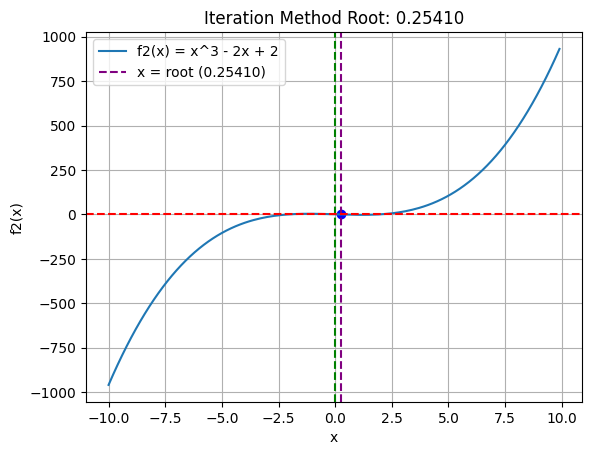

In [12]:
root = iteration_method(g2, 1)

# Let's plot the result
x = np.arange(-10, 10, 0.1)

plt.plot(x, f2(x), label='f2(x) = x^3 - 2x + 2')
plt.scatter(root, f2(root), color='blue')  # Mark the root on the plot
plt.axvline(root, color='purple', linestyle='--', label=f'x = root ({root:.5f})')

plt.axvline(0, color='green', linestyle='--')
plt.axhline(0, color='red', linestyle='--')

plt.xlabel('x')
plt.ylabel('f2(x)')
plt.title(f"Iteration Method Root: {root:.5f}")
plt.grid()
plt.legend()